<a href="https://colab.research.google.com/github/rohahnbiswas-works/Heart-Disease-Classification/blob/main/Code/end_to_end_heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Predictiong heart disease using ML


In [ ]:
#Problem Statement: Given medical param of a patient, we can predict whether or not they have heart disease

In [ ]:
#Only 14 attributes used:
      # 1. #3  (age)
      # 2. #4  (sex)
      # 3. #9  (cp)
      # 4. #10 (trestbps)
      # 5. #12 (chol)
      # 6. #16 (fbs)
      # 7. #19 (restecg)
      # 8. #32 (thalach)
      # 9. #38 (exang)
      # 10. #40 (oldpeak)
      # 11. #41 (slope)
      # 12. #44 (ca)
      # 13. #51 (thal)
      # 14. #58 (num)       (the predicted attribute)

In [ ]:
#Preparing our tools

#Regular EDA and plotting libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
#load data
df=  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart-disease.csv")
df.shape

(303, 14)

In [ ]:
#Data exploration # becoming a subject matter expert on the data you are working on.
#what type of questions we are trying to solve?
#what kind of data do we have and how do we deal with it?
#whats is the missing data ?
#where are the outliners and why should you care about them?
#how can we add,change or remove features from our data?

In [ ]:
df["target"].value_counts()

,count
target,
1,165
0,138


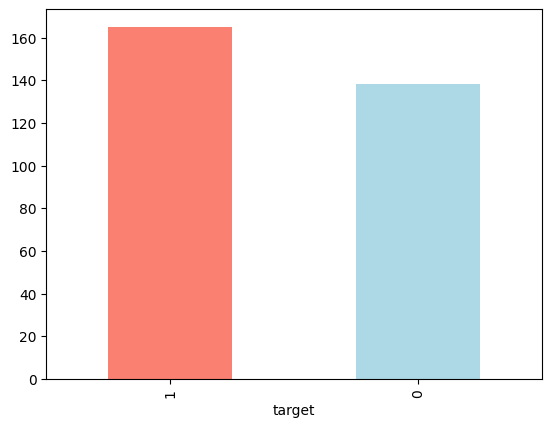

In [ ]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Heart disease frequency according to sex
df["sex"].value_counts()

,count
sex,
1,207
0,96


In [ ]:
#Compare target column wth sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


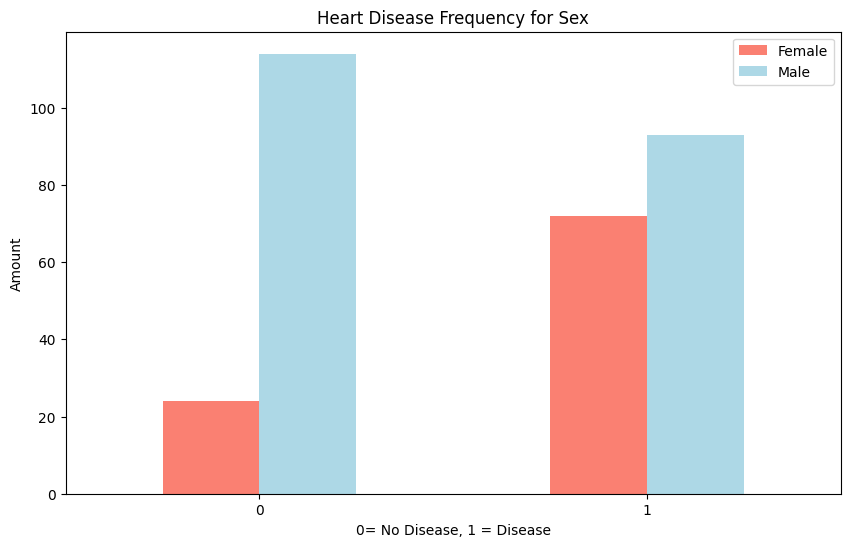

In [ ]:
#Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0= No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

In [ ]:
df["thalach"].value_counts() #maximum heart rate achieved

,count
thalach,
162,11
163,9
160,9
173,8
152,8
...,...
117,1
71,1
118,1


Text(0, 0.5, 'Max Heart Rate')

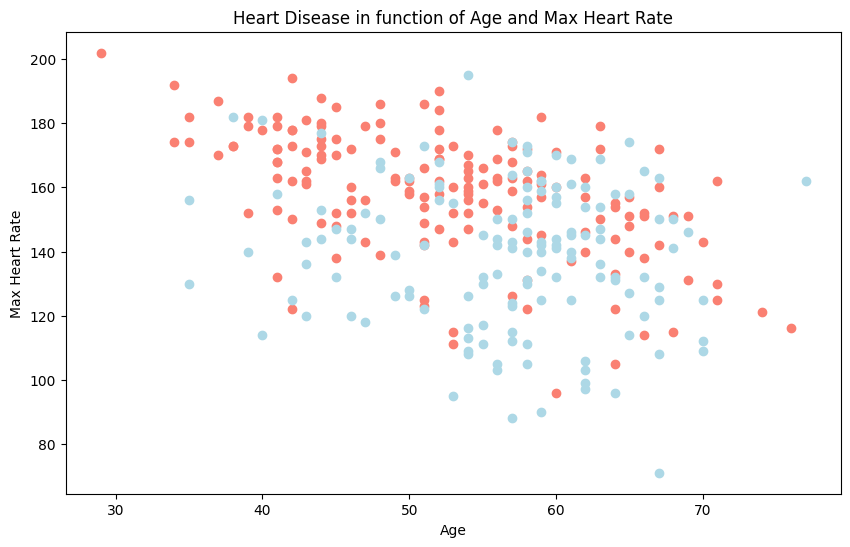

In [ ]:
#Age vs max heart rate for heart disease
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

#Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")


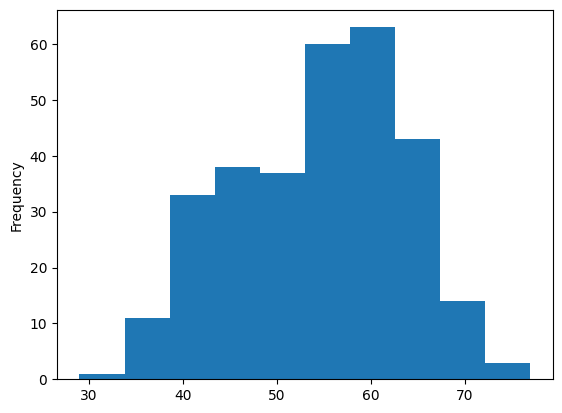

In [ ]:
#Check the distrubution of age column with histogram
df.age.plot.hist();

In [ ]:
#Heart disease frequency per chest pain type
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


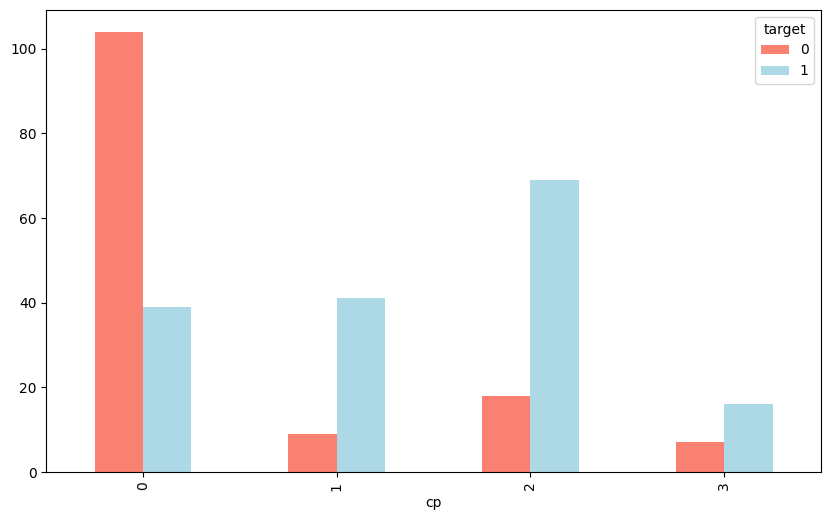

In [ ]:
#make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"]);

In [ ]:
#make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


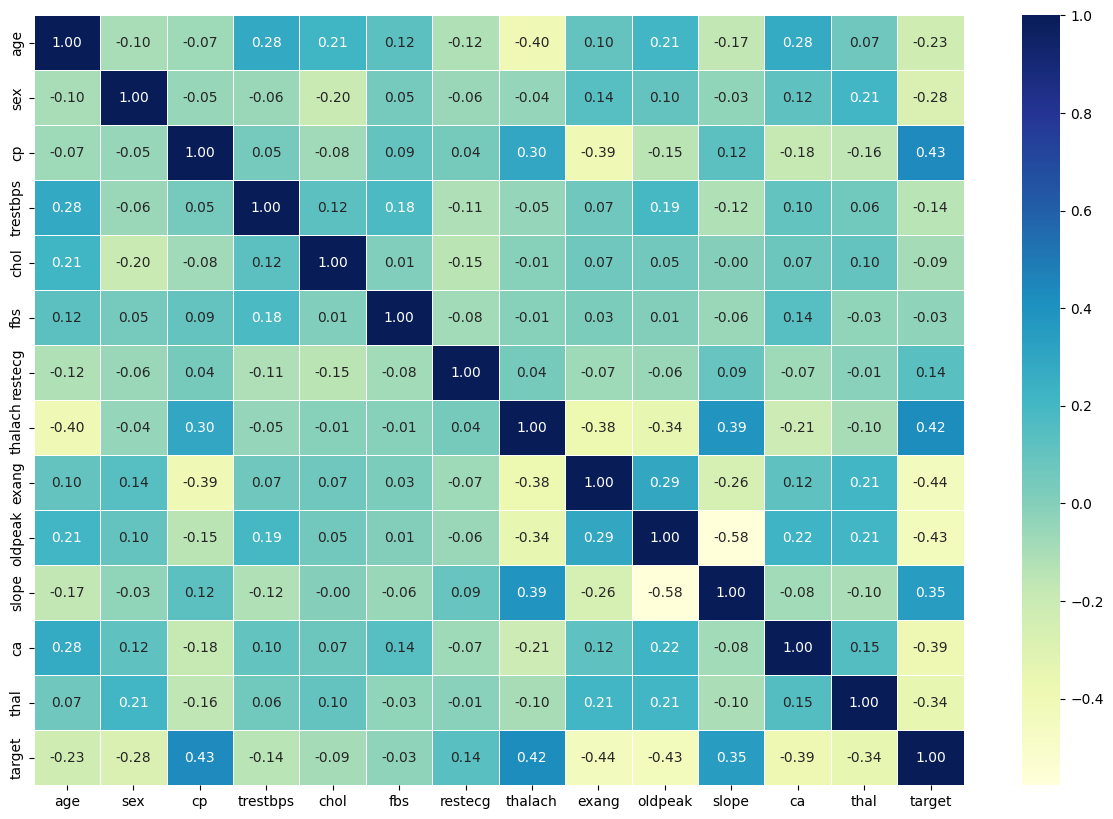

In [ ]:
#correlation matrix visualiation
corr_matrix= df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");


In [ ]:
# modelling
#Split data into X and y
X=df.drop("target",axis=1)
y=df["target"]

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
#Split data into train and test sets
np.random.seed(42)

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [ ]:
len(y_train),len(y_test),len(y)

(242, 61, 303)

In [ ]:
#now we train a ml model to find the patterns and then we will test our model
#LogisticRegression
#Knearestneighbors
#RandomForestClassifier

In [ ]:
#Put models in a dictionary
models={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models , X_train, X_test, y_train, y_test):
       #Set random seed
       np.random.seed(42)
       #make a dictionary to keep model scores
       model_scores={}
       #Loop through models
       for name,model in models.items():
        #Fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test,y_test)
       return model_scores


In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

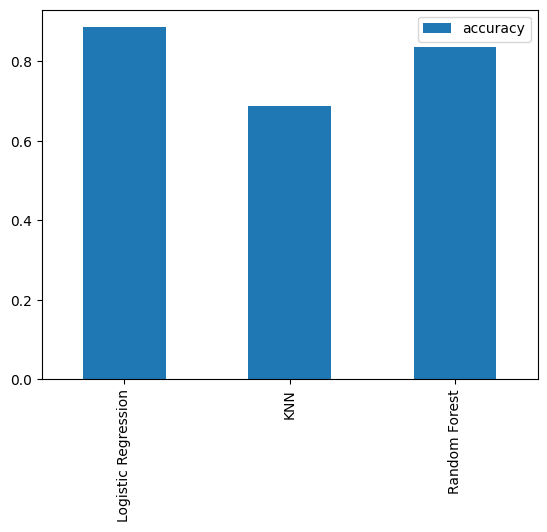

In [ ]:
#Visualization
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [ ]:
#Hyperparam tuning
#Featue importance
#Conf matrix
#Cross-val
#Precision
#Recall
#F1 score
#Classification report
#ROC curve
#Area under the curve (AUC)

In [ ]:
#tuning knn(by and)

train_scores=[]
test_scores=[]

#Create a list of diff values for n_neighbours
neighbors=range(1,121)

#Setup KNN instnce
knn= KNeighborsClassifier()

#Loop through diff n_neighbours
for i in neighbors:
  knn.set_params(n_neighbors=i)
  #Fit the algorithm
  knn.fit(X_train,y_train)

  #Update the training scores list
  train_scores.append(knn.score(X_train, y_train))

  #Update the test scores list
  test_scores.append(knn.score(X_test,y_test))

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7377049180327869,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.7213114754098361,
 0.7049180327868853,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.72131147540

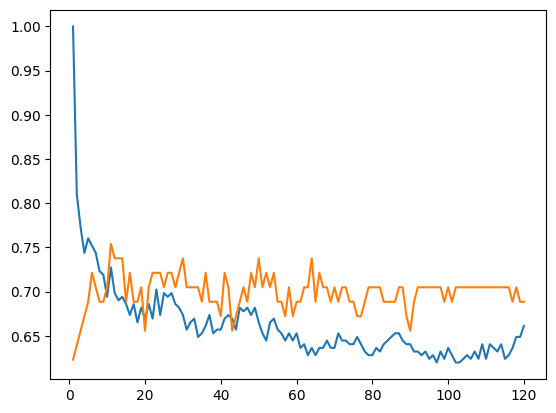

In [ ]:
plt.plot(neighbors,train_scores,label="Train Score");
plt.plot(neighbors,test_scores,label="Test Score");

In [ ]:
#KNN bad

In [ ]:
#Hyperparam tuning with GridSearchCV
log_reg_grid={"C": np.logspace(-4,4,30),
              "solver":["liblnear"]}

#Setup grid hyperparam search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#Fit grid hyperparam search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


ValueError: 
All the 150 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'solver' parameter of LogisticRegression must be a str among {'liblinear', 'lbfgs', 'sag', 'saga', 'newton-cholesky', 'newton-cg'}. Got 'liblnear' instead.


In [ ]:
gs_log_reg.best_params_

In [ ]:
#evaluating our tuned machine learning classifier
#feature importance
# which features contribute most to the model and how?

In [ ]:
#Fit an instance of Logisitic Regression
clf= LogisticRegression(C=0.2033359718569418,
                        solver="liblinear")
clf.fit(X_train,y_train)

In [ ]:
clf.coef_

In [ ]:
#match coef of features to columns
features_dict=dict(zip(df.columns,list(clf.coef_[0])))
features_dict

In [ ]:
#visualize feature importance
feature_df= pd.DataFrame(features_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [ ]:
pd.crosstab(df.sex,df.target)

In [ ]:
pd.crosstab(df["slope"],df["target"])

In [ ]:
#slope: sloping:Unsloping
#1 : flatloping
#2: downslopping : unhealthy heart